In [1]:
library(tidyverse)
library(repr)

players_data <- read_csv("players.csv")
sessions_data <- read_csv("sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

# 1. Data Description
Data was collected through an online Minecraft server, PLAICraft, where researchers tracked players' actions.

### 1.1 players.csv

In [2]:
# number of observations

nrow(players_data)

[1] 196

**Summary of player experience**

In [3]:
players_experience <- players_data |>
    group_by(experience) |>
    summarize(count = n()) |>
    arrange(desc(count))
players_experience


experience,count
<chr>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


Majority of players are amateurs, while the pro players make up the least of individuals in this data. 

**Summary of player subscription**

In [4]:
players_sub <- players_data |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    arrange(desc(count))   
players_sub

subscribe,count
<lgl>,<int>
TRUE,144
FALSE,52


More players are subscribed, which would likely be favoured by the researchers, as players would get news and updates easier and be easily recuited for future projects.


**Summary of player genders**

In [5]:
# summary of player genders
players_gender <- players_data |>
    group_by(gender) |>
    summarize(count = n()) |>
    arrange(desc(count))
players_gender

gender,count
<chr>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Two-Spirited,6
Agender,2
Other,1


Most players are male.

- number of variables: 7
- name and type of variables:
    - experience (chr), subscribe (lgl), hashedEmail (chr), played_hours (dbl), name (chr), gender (chr), age (dbl)
- variable meaning:
    - experience: player experience sorted into beginner, amateur, regular, veteran, or pro.
    - subscribe: whether players are subscribed to the game.
    - hashedEmail: encrypted version of players' email addresses.
    - played_hours: total hours spent playing the game
    - name: first name of players
    - gender: gender of players
    - age: age of the players (years)
- visible issues:
    - some NA values in "Age" column; use na.rm = TRUE to account for this.
    - perhaps not enough variation in entries to visualize strong trends (most age values are ~20 yrs old)
- invisible issues:
    - unclear how was player experience was determined
    - unclear how player experience levels are ranked (i.e. is pro higher or lower than veteran?)

### 1.2 sessions.csv


In [6]:
# number of observations

nrow(sessions_data)

[1] 1535

- number of variables: 5
- name and type of variables:
    - hashedEmail (chr), start_time (chr) end_time (chr), original_start_time (dbl), original_end_time (dbl)
- variable meaning:
    - hashedEmail: explained above in players.csv
    - start_time: when player started playing, in dd/mm/yyyy [24h time]
    - end_time: when player stopped playing, in dd/mm/yyyy [24h time]
    - original_start_time: when player started playing, in UNIX format (milliseconds)
    - original_end_time: when player stopped playing, in UNIX format (milliseconds)
- visible issues:
    - hashedEmail is hard to interpret
    - start and end time have both the date and time in one cell (untidy)

# 2. Questions


I'm addressing the question of which "kinds" of players are most likely to contribute a large amount of data to the research so that they can be targeted in recruitement efforts. Specifically, I am interested in whether player gender can be predicted from number of hours of PLAICraft played from the players.csv dataset. The players.csv data will help me answer this questions by supplying data from which I can create a classification model to visualize and predict whether there is a relationship between hours played and gender of players (i.e. which gender tends to spend the most time on the game).


# 3. Exploratory Data Analysis and Visualization


**Focusing on the players.csv dataset here, as my question only pertains to the "gender" and "played_hours" variables**

The players.csv data does not require any wrangling, it is already tidy. Each variable has its own column, each value has its own cell, and each observation is its own row:

In [7]:
options(repr.matrix.max.rows = 6)
players_data 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### 3.1 Summary stats

**Summary of hours played**

In [8]:
#played hours summary stats
players_hours <- players_data |>
    mutate(max_hours = max(played_hours), 
            min_hours = min(played_hours), 
            avg_hours = mean(played_hours)) |>
    select(max_hours, min_hours, avg_hours) |>
    slice(1) |>
    mutate(avg_hours = round(avg_hours, 2))
players_hours


max_hours,min_hours,avg_hours
<dbl>,<dbl>,<dbl>
223.1,0,5.85


**Summary of player age**

In [9]:
# summary of player ages
players_age <- players_data |>
    mutate(max_age = max(Age, na.rm = TRUE), 
            min_age = min(Age, na.rm = TRUE), 
            avg_age = mean(Age, na.rm = TRUE)) |>
    select(max_age, min_age, avg_age) |>
    slice(1) |>
    mutate(avg_age = round(avg_age, 2))
players_age

max_age,min_age,avg_age
<dbl>,<dbl>,<dbl>
58,9,21.14


### 3.2 Visualizations

**3.2.1 Gender vs played_hours**\
Plotting gender vs played_hours to see any trends present between the two variables.


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




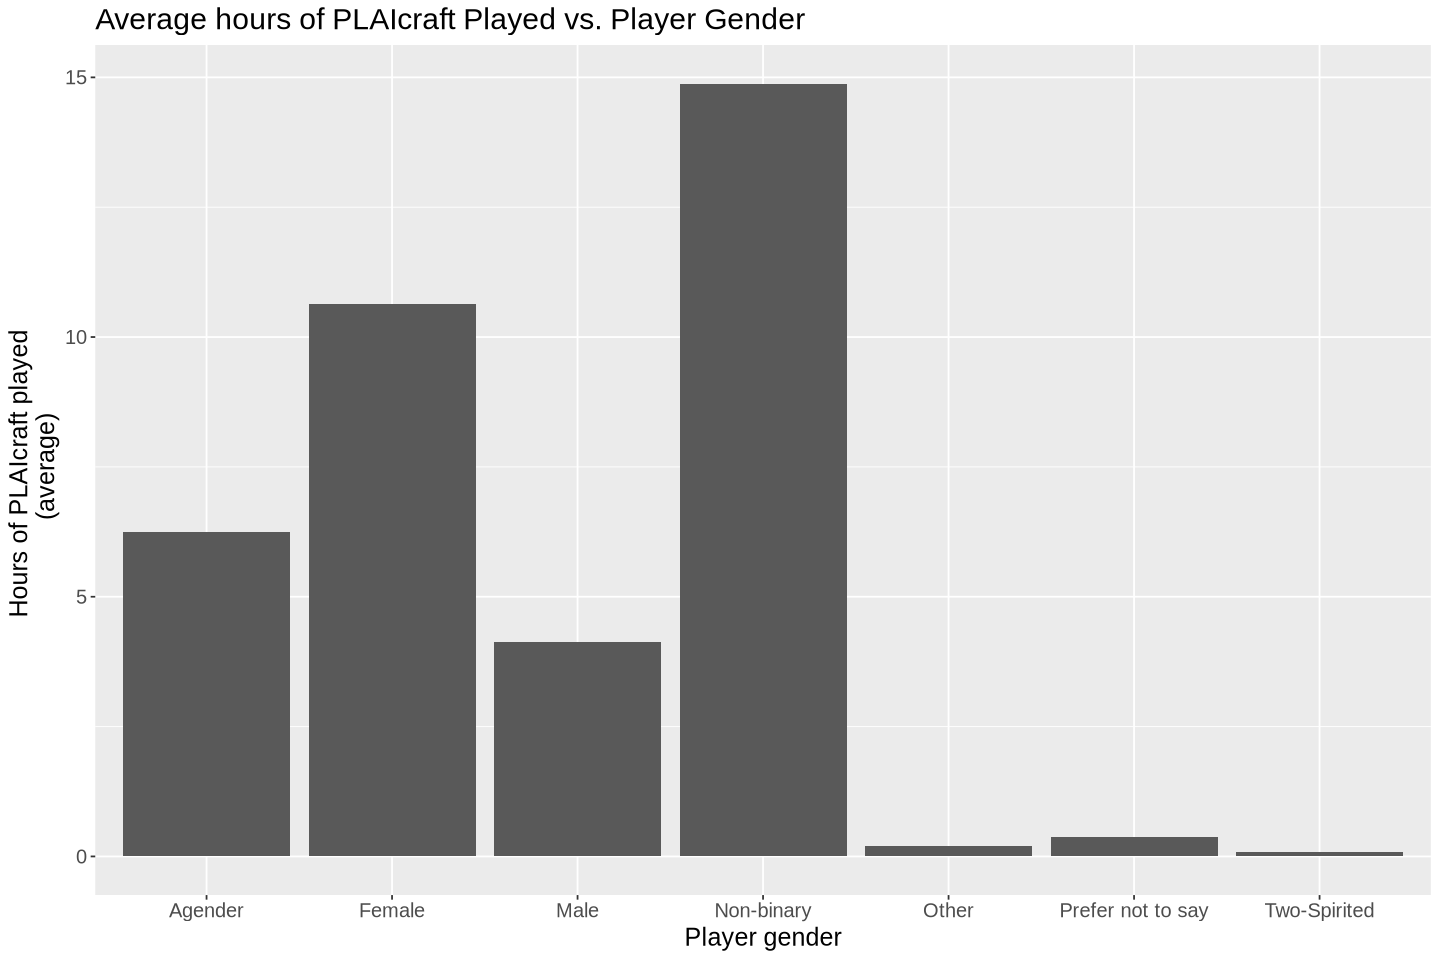

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8)
library(scales)

gender_vs_hours_plot <- players_data |>
    group_by(gender) |>
    summarize(avg_hours = mean(played_hours)) |>
    ggplot(aes(x = gender, y = avg_hours)) +
    geom_bar(stat = "identity") +
    xlab("Player gender") +
    ylab("Hours of PLAIcraft played \n (average)") +
    ggtitle("Average hours of PLAIcraft Played vs. Player Gender") +
    theme(text = element_text(size = 15))  
gender_vs_hours_plot

Non-binary players have highest average play time, likely because of having few entries with long play time. Conversely, male players have the most entries, some of which having a high player time, however it is more "balanced out" by the male entries
who played for a short time; this may be an issue.

**3.2.2 Age vs played_hours**\
Plotting age vs played_hours for potential trend in hours of game played based on age.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


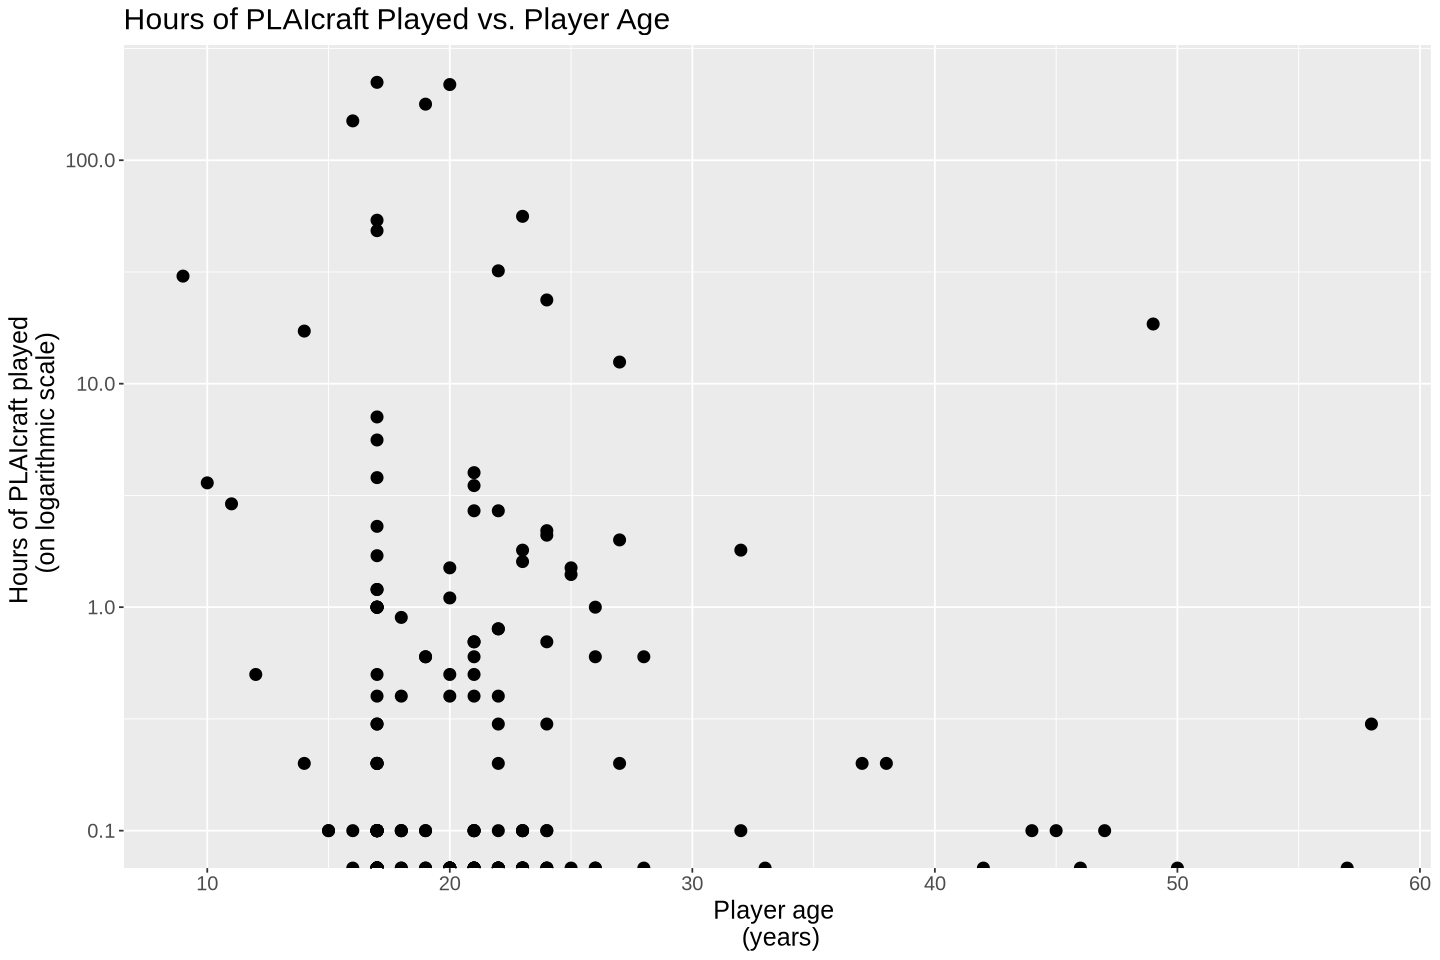

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)
library(scales)

age_vs_hours_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(size = 3) +
    xlab("Player age \n (years)") +
    ylab("Hours of PLAIcraft played \n (on logarithmic scale)") +
    ggtitle("Hours of PLAIcraft Played vs. Player Age") +
    theme(text = element_text(size = 15)) +
    scale_y_log10() 
age_vs_hours_plot

There is a weak downward trend from 20-60 old players, which could suggest that hours played decreases with age. However, this is likely due to less entries of people over the age of 30.

# Methods and Plan

My answer requires a knn-classification model using the players.csv dataset. This model is appropriate because I am using a quantitative variable (hours_played) to predict a character vector (gender). The requires the assumption that the genders correctly represent who was playing in a given observation. Potential issues/limitations include the dataset being to small to capture an interpretable trend, and the classifying labels being unbalanced; I will thus pre-balance the data. I will then randomly (reproduceably) split the data into 0.75 training and 0.25 testing proportions. I am going to use cross-validation to select the correct model, seeing what k gives the best prediction accuracy on training data. I will use 5 folds and a reproduceably random validation set. This will occur after pre-processing but before determining the best k.  


# GitHub Repository